### 회귀실습 : 자전거 대여 수요 예측

In [39]:
# 자전거 데이터 확인

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df = pd.read_csv('./csv/train_bike.csv')

print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [40]:
# 데이터 타입, null값 확인

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [41]:
# 데이터 타입 변경 삭제

# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# # datetime 타입에서 년, 월, 일, 시간 추출1
# bike_df['year'] = pd.DatetimeIndex(bike_df['datetime']).year
# bike_df['month'] = pd.DatetimeIndex(bike_df['datetime']).month
# bike_df['day'] = pd.DatetimeIndex(bike_df['datetime']).day
# bike_df['hour'] = pd.DatetimeIndex(bike_df['datetime']).hour

# # datetime 타입에서 년, 월, 일, 시간 추출2
# bike_df['year'] = bike_df['datetime'].dt.strftime('%Y')
# bike_df['month'] = bike_df['datetime'].dt.strftime('%m')
# bike_df['day'] = bike_df['datetime'].dt.strftime('%d')
# bike_df['hour'] = bike_df['datetime'].dt.strftime('%H')


# datetime 타입에서 년, 월, 일, 시간 추출3
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [42]:
# data type 확인후 불필요한 목록 삭제
bike_df.info()

drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [43]:
# 에러 함수들 정의 후 선형회귀 학습/예측
from sklearn.metrics import mean_absolute_error, mean_squared_error

# log 값 변환 시 NaN등의 이슈로 log()가 아닌 log1p()를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    sqaured_error = (log_y - log_pred) **2
    rmsle = np.sqrt(np.mean(sqaured_error))
    return rmsle

# 사이킷런의 mean_square_error()를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y, pred))

# MAE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y,pred)
    # MAE는 scikit learn의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print('RMLSE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [44]:
# 학습 데이터, 테스트 데이터 분리
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=107)

# 선형회귀 적용 후 학습/예측/평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMLSE: 1.168, RMSE: 141.468, MAE: 106.975


In [45]:
# 예측값과 실제값 오차 확인
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측값을 서로 비교할 수 있도록 생성
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값의 차이가 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
489          817            169.0  648.0
1244         834            188.0  646.0
2852         839            202.0  637.0
1923         835            211.0  624.0
1036         943            359.0  584.0


In [46]:
# 타겟값에 로그를 취해서 정규화

# 타겟 컬럼인 count를 log1p로 Log변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=107)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 exmp1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 테스트 데이터 셋의 Target값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMLSE: 1.008, RMSE: 160.719, MAE: 107.214


<AxesSubplot:>

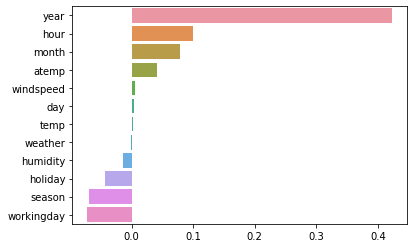

In [47]:
# 피처 별 회귀계수 확인

coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [48]:
# 원핫 인코딩 후 다시 학습/예측

# 'year', 'month', 'hour', 'season', 'weather', feature들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'hour', 'holiday', 'workingday', 'season', 'weather'])


In [49]:
# 원핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test =\
    train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMLSE: 0.589, RMSE: 97.485, MAE: 63.106
### Ridge ###
RMLSE: 0.589, RMSE: 98.407, MAE: 63.648
### Lasso ###
RMLSE: 0.634, RMSE: 113.031, MAE: 72.658


<AxesSubplot:>

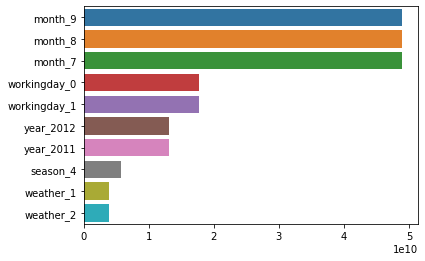

In [50]:
# 원핫 인코딩 후 회귀계수 확인

coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [51]:
# 회귀 트리 사용

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM, model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg]:
    # XGBoost의 경우 DataFrmae이 입력될 경우 버전에 따라 오류 발생가능. ndarray로 변환
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMLSE: 0.353, RMSE: 50.574, MAE: 31.385
### GradientBoostingRegressor ###
RMLSE: 0.340, RMSE: 55.770, MAE: 34.339


### 차원축소

- 단순히 데이터 압축을 의미하는 것이 아니라 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데 있다.
#
- 추천 엔진
- 이미지 분류 및 변환
- 문서 토픽 모델링

#### PCA

- 고차원 원본 데이터를 저차원의 부분 공간으로 투영하여 데이터를 축소
- 원본 데이터가 가지는 데이터 변동성을 가장 중요한 정보로 간주 / 변동성에 기반한 원본 데이터를 투영하여 차원 축소를 수행
- 원본 데이터 변동성이 가장 큰 방향으로 순차적으로 축들을 생성 / 생성된 축으로 데이터 투영
#
- 벡터 축의 개수만큼 차원으로 원본 데이터가 차원 축소
#
- PCA 프로세스 : 입력 데이터의 공분산 행렬을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것
- 고유벡터 : PCA의 주성분 벡터로 입력 데이터의 분산이 큰 방향으로 나타냄 / 일정한 방향성을 지님
- 고윳값 : 고유벡터의 크기, 입력 데이터의 분산
#
- PCA 변환 : 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식
- PCA 변환 절차
    - 입력 데이터 세트의 공분산 행렬을 생성
    - 공분상 행렬의 고유벡터와 고유값을 계산
    - 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출
    - 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

### 공분산

- 보통 분산은 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동을 의미
- 사람 키를 변수 X, 몸무게를 변수 Y라고 하면 공분산 Cov(X,Y)>0 X(키)가 증가할 때 Y(몸무게)도 증가한다는 의미

In [52]:
import pandas as pd

# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [53]:
df.head()

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat


In [54]:
Y = df['body_shape']
X = df.drop(['body_shape'], axis = 1)

In [55]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

#### Covariance Matrix of Features
#
- 공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬이며 대칭 행렬
- https://angeloyeo.github.io/2019/07/27/PCA.
#
- 공분산 행렬 >> 고유베타 & 고유값
- 고유벡타 구하는 법
    1. 분산이 가장 큰 축을 PCA 축으로 정의 
    2. 첫번째 PCA 축의 수직으로 두번째 PCA 축을 정의 
    3. 반복

In [56]:
import numpy as np

features = x_std.T
covariance_matrix = np.cov(features)
covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

#### 고유벡터와 고유값 with 공분산 행렬

In [57]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [58]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [59]:
eig_vecs

array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [60]:
eig_vecs[0]

array([-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985])

In [61]:
sum(eig_vals)

5.5555555555555545

In [62]:
eig_vals[0]/sum(eig_vals)

0.7318321731427542

#### project data into selected eigen vector

In [63]:
# 행렬과 행렬을 곱하면 선형 변환이 된다

projected_x = x_std.dot(eig_vecs.T[0])

In [64]:
result = pd.DataFrame(projected_x, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result.head()

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

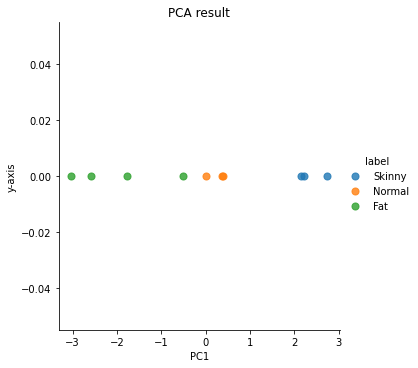

In [66]:
sns.lmplot('PC1', 'y-axis', data=result, scatter_kws={'s':50}, hue = 'label', fit_reg = False)
plt.title('PCA result')

#### sklearn PCA 라이브러리 사용

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

In [68]:
pca_x = pca.fit_transform(x_std)

pca_x = -1 * pca_x

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

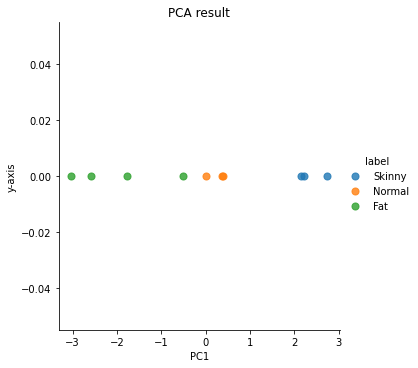

In [69]:
result = pd.DataFrame(pca_x, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=result, scatter_kws={'s':50}, hue = 'label', fit_reg = False)
plt.title('PCA result')

### 실습 : 붓꽃 데이터 PCA

- 숙제 : 붓꽃 데이터를 전처리 / train : test = 8 : 2 / 차원축소(components = 2) / Randomforest를 이용하여 학습 / 차원축소 하지 않은 것과 비교하여 accuracy로 평가

In [86]:
# 데이터 읽어오기
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target

print(irisDF.shape)
irisDF.head(3)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


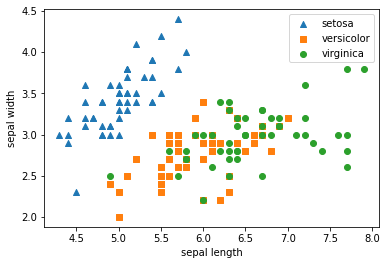

In [87]:
# 데이터 시각화 확인

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o'] # 세모, 네모, 동그라미

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [88]:
# 정규화
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF)

# PCA 수행(n_components = 2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# fit()과 transform()을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# 차원이 2차원으로 변환된 것 확인
print(iris_pca.shape)

(150, 2)


In [104]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']

irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


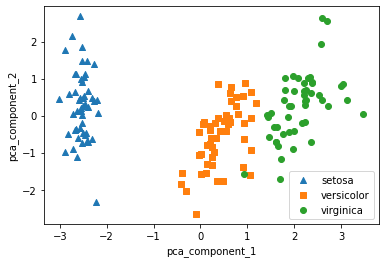

In [90]:
# PCA 차원 축소된 피처들로 데이터 산포도 시각화

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# pca_component_1을 x축, pca_component_2을 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [91]:
# 각 PCA Component 별 변동성 비율
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [108]:
# 원본 데이터와 PCA 변환된 데이터 간 랜덤포레스트 분류기 예측 성능 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)

# 원본 데이터
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)

print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [109]:
# PCA로 차원축소한 데이터
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print(scores_pca)
print(np.mean(scores_pca))

[0.98 0.98 1.  ]
0.9866666666666667
